# **1.- Primeros pasos: EDA**
Antes de proceder con el análisis de datos necesitamos primeramente obtener esos datos. Actualmente nuestro conjunto de datos incluye un montón de datos irrelevantes así que vamos a conseguir el conjunto que necesitamos.




## 1.1.- Obtener los datos

In [ ]:
from google.colab import files
import pandas as pd

# Sube el archivo wind_ava.csv desde tu ordenador
uploaded = files.upload()

# También es una opción montar el drive para incluir el archivo desde ahí
"""from google.colab import drive
drive.mount('/content/drive')"""


MessageError: Error: Cell has no view

In [ ]:
import re

# Leer el archivo CSV utilizando Pandas
df = pd.read_csv("wind_ava.csv")

# Vamos a eliminar los datos de las centrales que no queremos
patron = r'.*\.13$'
columnas_a_mantener = []
for column in df.columns:
  if column == "datetime" or column == "energy":
    columnas_a_mantener.append(column)
  if re.match(patron, column):
    columnas_a_mantener.append(column)
df = df[columnas_a_mantener]

## 1.2 - Analizar los datos
Ahora que ya tenemos los datos de interés que buscamos, podemos empezar a analizarlos

In [ ]:
# Veamos que aspecto tienen nuestros datos
df.head()

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


In [ ]:
# Y veamos informacion de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

Como podemos ver, tenemos un total de **4748 instancias**, indexadas por la fecha en la que se tomaron las medidas. Tenemos una columna energía que es en este caso nuestra label y luego tenemos un total de **22 atributos**, en nuestro caso los de la central de Sotavento. Como vemos, en principio **no hay ningún valor faltante o nulo para ningún atributo** lo que nos ayuda ya que no hay necesidad de limpiar los datos en ese aspecto.

Vemos también que todos nuestros atributos son **atributos numéricos**

In [ ]:
# Gracias a que nuestros atributos son numéricos, podemos desglosar un mini-análisis rapidamente
# de manera que podamos ver algunos datos como percentiles, la media, desviacion estandar, etc...
df.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


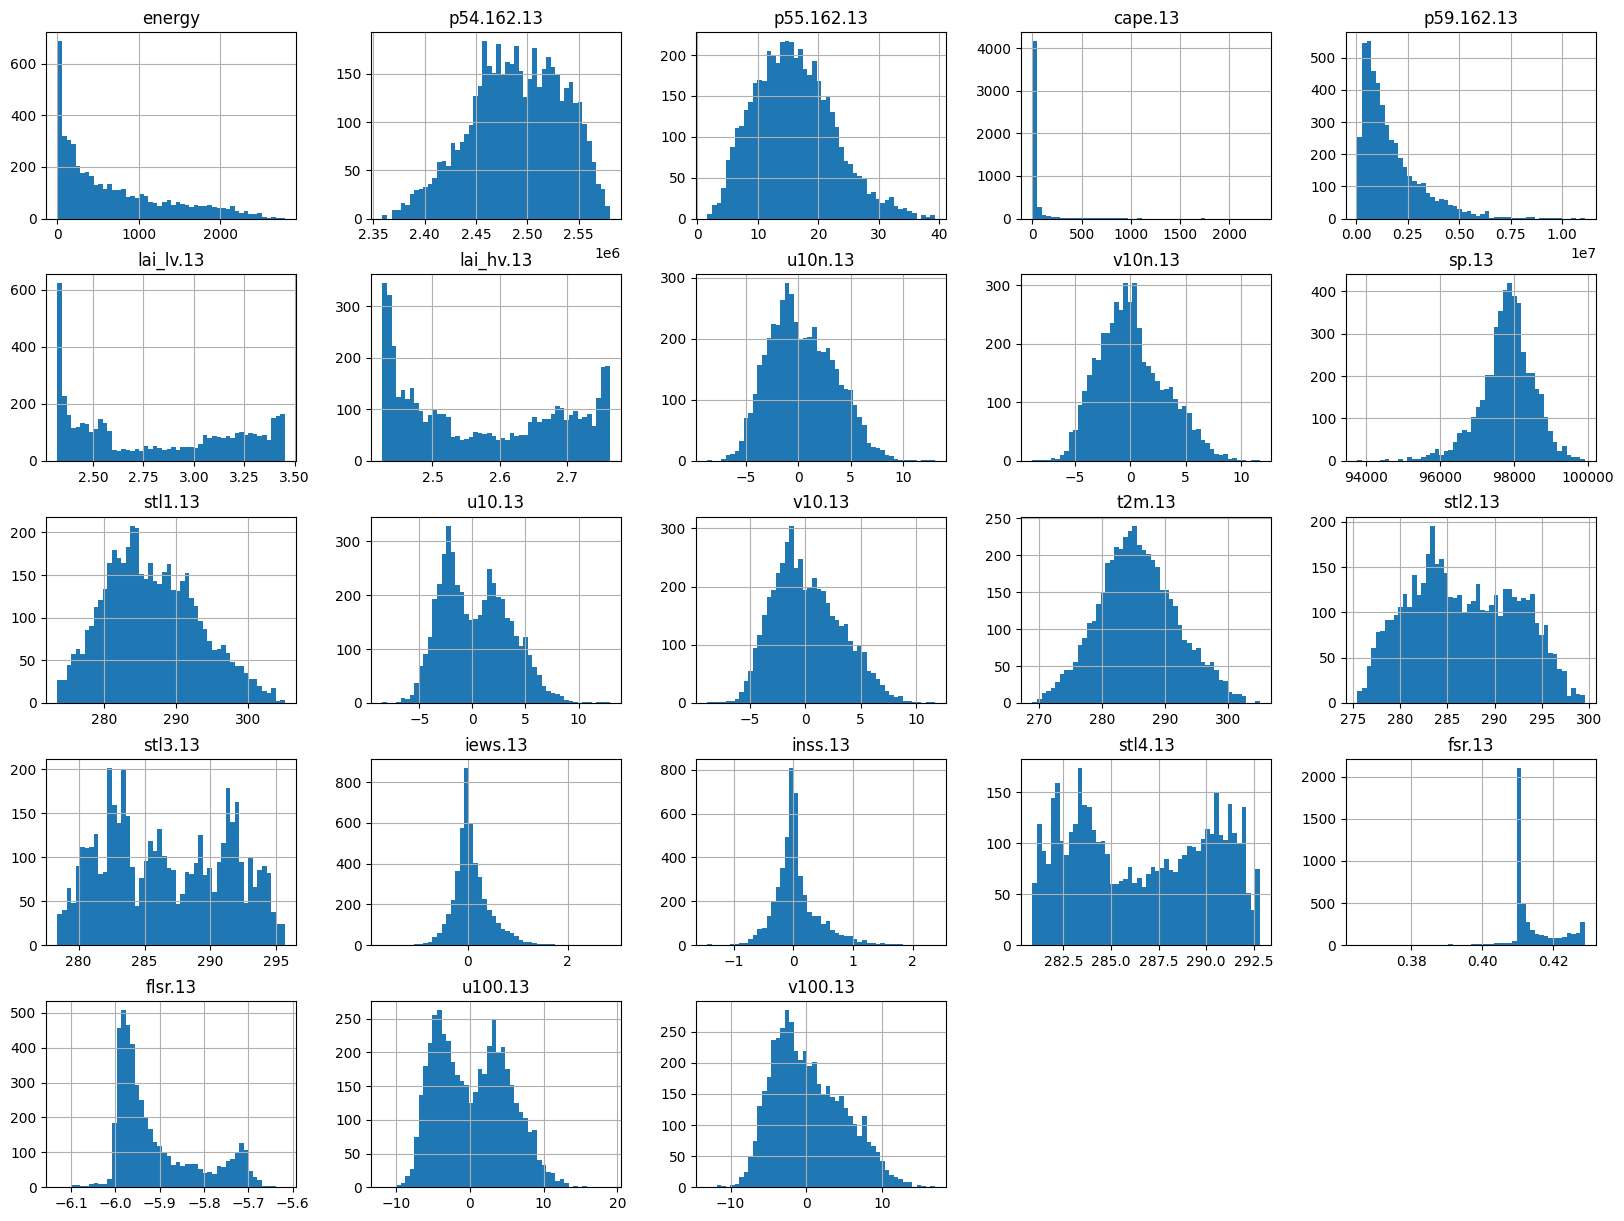

In [ ]:
# Si queremos verlo más visualmente, podemos hacer histogramas gracias a Matplotlib
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Gracias a estos histogramas podemos ver de un vistazo la distribución de valores de cada variable, lo que nos permite ver que **no tenemos tampoco problemas de columnas constantes** `(NOTA PARA TOM: la verdad es que el tema de cape, Convective available potential energy, me escama porque en un gran porcentaje es 0, pero luego a veces hay valores de 1000, lo que pasa es que como no sé que coño es el cape este pues no se decir si es normal o no)`. Tal como estamos viendo hay que calcular un valor de energía en función de estos atributos por lo que estamos ante un claro ejemplo de **problema de regresión**.
Veamos ahora qué atributos tienen una correlación más fuerte con la energía

In [ ]:
# Para ver la correlación, usamos .corr
df.corr()["energy"].sort_values(ascending=False)

<ipython-input-14-d63b03f51474>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["energy"].sort_values(ascending=False)


energy        1.000000
p59.162.13    0.446710
inss.13       0.345784
iews.13       0.323979
v10n.13       0.310246
v100.13       0.302290
v10.13        0.301370
u10.13        0.244619
u10n.13       0.241616
u100.13       0.236615
fsr.13        0.232329
flsr.13       0.151233
p55.162.13    0.000785
stl4.13      -0.046865
cape.13      -0.047995
t2m.13       -0.161310
stl3.13      -0.165994
sp.13        -0.191786
stl2.13      -0.192833
stl1.13      -0.197850
lai_lv.13    -0.211480
lai_hv.13    -0.213400
p54.162.13   -0.239832
Name: energy, dtype: float64

Como podemos ver, no hay ningún valor que tenga una correlación particularmente fuerte con la energía, si bien por ejemplo la integral vertical de la divergencia de la energía cinética tiene una correlación positiva moderada con la energía

`// NOTA PARA TOM: Seguramente habría que hacer más análisis y demás pero lo voy a dejar aquí de momento porque tampoco es que los datos estos ayuden mucho. Si fueran cosas comunes podriamos ver que datos serian mas importantes y hacer graficos y eso pero ahora mismo me da un poco de pereza porque son cosas tan especificas y complejas que no se que datos son mas importantes y eso. Volveremos aqui y profundizaremos mas el analisis mas adelante, tampoco es que cuente mucho este apartado `

# **2.- Elección de métricas**

En este apartado vamos a realizar un pequeño análisis para la elección de las métricas que usaremos tanto para la outer evaluation como para la inner evaluation, de manera que podamos ser lo más efectivos posibles a la hora de construir nuestros modelos.

## 2.1.- Outer Evaluation

Debido a la naturaleza de las mediciones, que se realizan de manera periódica, y que están indexadas según la fecha en que se toman, hemos decidido que lo óptimo es utilizar **validación cruzada para series temporales** (TimeSeriesSplit).

Para ello vamos a utilizar un número de pliegues temporales que actualmente no podemos predecir. A la hora de evaluar los modelos realizaremos un ánalisis para decidir el número final de pliegues por el que nos decantaremos, y cogeremos el que nos proporcione unos mejores resultados.

Por otro lado debemos decidir la propia métrica de evaluación. Dado que se trata de un problema claro de regresión vamos a decantarnos por o por **MSE** (Mean Squared Error) o por **MAE** (Mean Absolute Error) pero en el punto en el que nos encontramos no tenemos aún una decisión clara.

`// NOTA PARA TOM: Este párrafo igual lo cambiamos más adelante cuando ya hayamos hecho pruebas y veamos qué es lo que vamos a usar e incluso ampliar esto en función de lo que vayamos descubriendo y usando al final, hasta que realmente no nos pongamos en esa situación no podemos saberlo bien`



## 2.2.- Inner Evaluation

En cuanto a la técnica de evaluación para encontrar los hiperparámetros óptimos para cada modelo, vamos a utilizar, en principio, ya sea GridSearch o RandomSearch. La elección de uno u otro método recaerá en el número de hiperparámetros a evaluar y el rango de valores de los mismos. Es decir, dependiendo del método que usemos para la construcción del modelo utilizaremos uno u otro.

`// NOTA PARA TOM: Lo mismo que arriba. Si luego cuando acabemos queremos ampliar el párrafo o poner la técnica que hemos usado para cada método de construcción del modelo pues lo hacemos, de momento no se puede decir mucho más`

# **3.- Construcción de modelos**

En este apartado utilizaremos distintos métodos para construir y evaluar diferentes modelos para este problema. Variaremos los hiperparámetros en cada método y realizaremos una evaluación acerca de cada método así como una comparación general entre los métodos, de manera que podamos elegir un modelo definitivo que nos proporcione los mejores resultados posibles.

## 3.1.- Primer método: KNN (K Nearest Neighbors)

### 3.1.1.- Técnica de escalado para los datos

Lo primero que vamos a hacer para este primer método va a ser elegir una técnica de escalado para los datos, ya que si no KNN no funcionará bien porque los distintos atributos tienen rangos de valores muy dispares. Para ello no vamos a elegir una al azar sino que vamos a probarlo empirícamente probando las 3 técnicas: MinMax, Standarization y Robust Scaler.

// NOTA PARA TOM: He puesto que vamos a probar los 3 porque digo yo que es lo mejor para elegir uno de los 3. Míralo a ver si deberíamos hacerlo así pero yo creo que sí. Habría que crear 3 knn rapidamente y probarlos para ver cual acierta mas o lo que sea. De todas formas MinMax y Standarization me parece que se usan bastante aunque no se por qué uno u otro, luego Robust Scaler se usa para cuando hay muchos valores atípicos igual se puede mirar eso también

## 3.2.- Segundo método: árboles de regresión

## 3.3.- Tercer método: regresión lineal estándar


## 3.4.- Cuarto método: regresión lineal Lasso

## 3.5.- Quinto método: SVM (Support Vector Machine)